codebook : https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [2]:
import pandas as pd
import numpy as np


brfss = pd.read_csv('2015.csv')

clean = brfss.copy()

In [3]:
variables = ['_STATE','IMONTH','NUMADULT','CCLGHOUS','GENHLTH','PHYSHLTH','CHECKUP1',
             'BPHIGH4','DIABETE3','HLTHPLN1','MEDCOST','TOLDHI2','CVDINFR4','ASTHMA3','CHCSCNCR',
           'CHCOCNCR','ADDEPEV2','VETERAN3','DECIDE','DIFFALON','SMOKE100','SEX','MARITAL','EDUCA',
             'EMPLOY1','CHILDREN','INCOME2','WEIGHT2','ALCDAY5','FRUIT1',
             "FVBEANS", "FVGREEN", "FVORANG", "VEGETAB1", 
             "EXERANY2", "EXEROFT1", "STRENGTH", "LMTJOIN3", "ARTHDIS2", 
            "JOINPAIN", "PREDIAB1", "CAREGIV1", "CRGVLNG1", "CRGVHRS1", "CIMEMLOS", "DRADVISE",
             'SCNTMNY1', 'SCNTMEL1','SCNTWRK1','SXORIENT','TRNSGNDR','EMTSUPRT', 'LSATISFY', 
             'ADPLEASR', 'ADSLEEP', 'ADENERGY', 'ADEAT1','ADFAIL','ADTHINK','MISTMNT','ADANXEV',
            '_LMTSCL1', '_LMTWRK1', '_LMTACT1', '_PASTAE1',
             '_PAREC1', '_PA300R2', '_PA150R2', '_PAINDX1', '_PACAT1', 'PA1MIN_', '_TOTINDA', 
             '_VEG23', '_VEGESUM', '_FRTLT1', '_VEGLT1','_FRUTSUM', '_RFDRHV5', '_DRNKWEK', 
             '_RFBING5', '_SMOKER3', '_INCOMG', '_BMI5CAT', '_AGE80', '_DRDXAR1', 
             '_RFHYPE5', '_RFHLTH', '_PASTRNG']


data = brfss.loc[:, variables]
clean = data.copy()
clean.head()

,_STATE,IMONTH,NUMADULT,CCLGHOUS,GENHLTH,PHYSHLTH,CHECKUP1,BPHIGH4,DIABETE3,HLTHPLN1,...,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_BMI5CAT,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,_PASTRNG
0,1.0,b'01',3.0,NaN,5.0,15.0,1.0,1.0,3.0,1.0,...,5.397605e-79,1.0,3.0,2.0,4.0,63.0,1.0,2.0,2.0,2.0
1,1.0,b'01',1.0,NaN,3.0,88.0,4.0,3.0,3.0,2.0,...,5.397605e-79,1.0,1.0,1.0,3.0,52.0,2.0,1.0,1.0,2.0
2,1.0,b'02',2.0,NaN,4.0,15.0,1.0,3.0,3.0,1.0,...,9.990000e+04,9.0,9.0,9.0,2.0,71.0,1.0,1.0,2.0,9.0
3,1.0,b'01',3.0,NaN,5.0,30.0,1.0,1.0,3.0,1.0,...,5.397605e-79,1.0,4.0,5.0,3.0,63.0,1.0,2.0,2.0,2.0
4,1.0,b'01',2.0,NaN,5.0,20.0,1.0,3.0,3.0,1.0,...,5.397605e-79,1.0,4.0,9.0,2.0,61.0,1.0,1.0,2.0,2.0


In [20]:
# cleaning pages 1-34

value_map = {1.0: 'Alabama',2.0: 'Alaska', 4.0: 'Arizona', 5.0: 'Arkansas', 6.0: 'California', 8.0: 'Colorado', 
             9.0: 'Connecticut', 10.0: 'Delaware', 11.0: 'District of Columbia', 12.0: 'Florida', 13.0: 'Georgia',
             15.0: 'Hawaii', 16.0: 'Idaho', 17.0: 'Illinois', 18.0: 'Indiana', 19.0: 'Iowa', 20.0: 'Kansas',
             21.0: 'Kentucky',22.0: 'Louisiana',23.0: 'Maine' ,24.0: 'Maryland',25.0: 'Massachusetts',
             26.0: 'Michigan' ,27.0: 'Minnesota',28.0: 'Mississippi',29.0: 'Missouri',30.0: 'Montana',
             31.0: 'Nebraska' ,32.0: 'Nevada'  ,33.0: 'New Hampshire' ,34.0: 'New Jersey' ,35.0: 'New Mexico',
             36.0: 'New York' ,37.0: 'North Carolina' ,38.0: 'North Dakota',39.0: 'Ohio'  ,40.0: 'Oklahoma',
             41.0: 'Oregon',42.0: 'Pennsylvania',44.0: 'Rhode Island',45.0: 'South Carolina',46.0: 'South Dakota',
             47.0: 'Tennessee',48.0: 'Texas',49.0: 'Utah',50.0: 'Vermont',51.0: 'Virginia',53.0: 'Washington',
             54.0: 'West Virginia',55.0: 'Wisconsin',56.0: 'Wyoming',66.0: 'Guam',72.0: 'Puerto Rico'}
clean['_STATE'] = clean['_STATE'].replace(value_map)



value_map = {b'01': 'January', b'02': 'February', b'03': 'March', b'04': 'April', b'05':'May',b'06':'June',
             b'07':'July',b'08':'August',b'09': 'Spetember', b'10':'Ocetober',b'11':'November',b'12':'December'}

clean['IMONTH'] = clean['IMONTH'].replace(value_map)

clean.loc[(clean.NUMADULT == 'BLANK'),'NUMADULT']= np.nan

value_map = {1.0: 'Yes', 'BLANK':'No'}
clean['CCLGHOUS'] = clean['CCLGHOUS'].replace(value_map)

value_map = {1.0: 'Excellent', 2.0: 'Very Good', 3.0: 'Good', 4.0: 'Fair', 5.0:'Poor',6.0: np.nan,
             7.0: np.nan ,8.0: np.nan}
clean['GENHLTH'] = clean['GENHLTH'].replace(value_map)

clean.loc[(clean.PHYSHLTH == 77),'PHYSHLTH']= np.nan
clean.loc[(clean.PHYSHLTH == 99),'PHYSHLTH']= np.nan
clean.loc[(clean.PHYSHLTH == 88),'PHYSHLTH']=0

value_map = {1.0: 'One year', 2.0: 'Two years', 3.0: 'Five years', 4.0: 'over five', 
             7.0:np.nan,8.0:'Never',9.0: np.nan, 'BLANK':np.nan}

clean['CHECKUP1'] = clean['CHECKUP1'].replace(value_map)


value_map = {1.0: 'Yes', 2.0: 'NO', 3.0:'NO', 4.0:'NO',7.0:np.nan, 9.0: np.nan, 'BLANK':np.nan}

clean['BPHIGH4'] = clean['BPHIGH4'].replace(value_map)

value_map = {1.0: 'Yes', 2.0: 'NO', 3.0:'NO', 4.0:'NO',7.0:np.nan, 9.0: np.nan, 'BLANK':np.nan}

clean['DIABETE3'] = clean['DIABETE3'].replace(value_map)

var_list = ['HLTHPLN1','MEDCOST','TOLDHI2','CVDINFR4','ASTHMA3','CHCSCNCR',
           'CHCOCNCR','ADDEPEV2','VETERAN3','DECIDE','DIFFALON','SMOKE100']

for var in var_list:
    
    value_map = {1.0: 1, 2.0: 0, 7.0:np.nan, 9.0: np.nan, 'BLANK':np.nan}

    clean[var] = clean[var].replace(value_map)
    

value_map = {1.0: 'Male', 2.0: 'Female'}
clean['SEX'] = clean['SEX'].replace(value_map)

value_map = {1.0: 'Married', 2.0: 'Divorces', 3.0: 'Widowed', 4.0: 'Separated', 5.0:'Never Married',6.0:'Unmarried Couple',
             9.0: 'Refused'}

clean['MARITAL'] = clean['MARITAL'].replace(value_map)

value_map = {1.0: 'None', 2.0: 'primary', 3.0: 'some secondary', 4.0: 'secondary', 5.0:'some college',6.0:'college',
             9.0: 'Refused'}

clean['EDUCA'] = clean['EDUCA'].replace(value_map)

value_map = {1.0: 'Employed', 2.0: 'Self-Employed', 3.0: '1 year out of work', 4.0: 'less than 1 year out of work', 5.0:'homemaker',6.0:'student',
             7.0:'retired',8.0:'unable to work',9.0: np.nan}

clean['EMPLOY1'] = clean['EMPLOY1'].replace(value_map)

clean.loc[(clean.CHILDREN == 'BLANK'),'CHILDREN']= np.nan
clean.loc[(clean.CHILDREN == 99),'CHILDREN']= np.nan
clean.loc[(clean.CHILDREN == 88),'CHILDREN']=0

value_map = {1.0: '<10,000', 2.0: '<15,000', 3.0: '<20,000', 4.0: '<25,000', 5.0:'<35,000',6.0:'<50,000',
             7.0:'<75,000',8.0:'75,000+',77.0: np.nan, 99.0:np.nan,'BLANK':np.nan}

clean['INCOME2'] = clean['INCOME2'].replace(value_map)

clean.loc[(clean.WEIGHT2 == 'BLANK'),'WEIGHT2']= np.nan
clean.loc[(clean.WEIGHT2 == 7777),'WEIGHT2']= np.nan
clean.loc[(clean.WEIGHT2 == 9999),'WEIGHT2']=np.nan

clean['WEIGHT2'] = np.where((clean['WEIGHT2'] >= 9000), 
                               np.mod(clean['WEIGHT2'], 9000)*2.2, clean['WEIGHT2'])


clean.loc[(clean.ALCDAY5 == 'BLANK'),'ALCDAY5']= np.nan
clean.loc[(clean.ALCDAY5 == 777),'ALCDAY5']= np.nan
clean.loc[(clean.ALCDAY5 == 999),'ALCDAY5']=np.nan
clean.loc[(clean.ALCDAY5 == 888),'ALCDAY5']=0

#making it all within the last month

clean['ALCDAY5'] = np.where((clean['ALCDAY5'] <= 200), 
                               np.mod(clean['ALCDAY5'], 100)*4, clean['ALCDAY5'])
clean['ALCDAY5'] = np.where((clean['ALCDAY5'] >= 200), 
                               np.mod(clean['ALCDAY5'], 200), clean['ALCDAY5'])


clean.loc[(clean.FRUIT1 == 'BLANK'),'FRUIT1']= np.nan
clean.loc[(clean.FRUIT1 == 777),'FRUIT1']= np.nan
clean.loc[(clean.FRUIT1 == 999),'FRUIT1']=np.nan
clean.loc[(clean.FRUIT1 == 555),'FRUIT1']=0
clean.loc[(clean.FRUIT1 == 300),'FRUIT1']=0

#making it all within the last month
clean['FRUIT1'] = np.where((clean['FRUIT1'] <= 200), 
                               np.mod(clean['FRUIT1'], 100)*30, clean['FRUIT1'])
clean['FRUIT1'] = np.where((clean['FRUIT1'] >= 200)&(clean['FRUIT1'] < 300), 
                               np.mod(clean['FRUIT1'], 200)*4, clean['FRUIT1'])
clean['FRUIT1'] = np.where((clean['FRUIT1'] > 300)&(clean['FRUIT1'] < 400), 
                               np.mod(clean['FRUIT1'], 300), clean['FRUIT1'])


clean

,_STATE,IMONTH,NUMADULT,CCLGHOUS,GENHLTH,PHYSHLTH,CHECKUP1,BPHIGH4,DIABETE3,HLTHPLN1,MEDCOST,TOLDHI2,CVDINFR4,ASTHMA3,CHCSCNCR,CHCOCNCR,ADDEPEV2,VETERAN3,DECIDE,DIFFALON,SMOKE100,SEX,MARITAL,EDUCA,EMPLOY1,CHILDREN,INCOME2,WEIGHT2,ALCDAY5,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXEROFT1,STRENGTH,LMTJOIN3,ARTHDIS2,JOINPAIN,PREDIAB1,CAREGIV1,CRGVLNG1,CRGVHRS1,CIMEMLOS,DRADVISE,SCNTMNY1,SCNTMEL1,SCNTWRK1,SXORIENT,TRNSGNDR,EMTSUPRT,LSATISFY,ADPLEASR,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,MISTMNT,ADANXEV,_LMTSCL1,_LMTWRK1,_LMTACT1,_PASTAE1,_PAREC1,_PA300R2,_PA150R2,_PAINDX1,_PACAT1,PA1MIN_,_TOTINDA,_VEG23,_VEGESUM,_FRTLT1,_VEGLT1,_FRUTSUM,_RFDRHV5,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_BMI5CAT,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,_PASTRNG,POOR_MENTHLTH
0,Alabama,b'01',3.0,NaN,Poor,15.0,One year,Yes,NO,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Female,Married,secondary,unable to work,0.0,"<20,000",280.0,0.0,0.0,20.0,10.0,5.0,30.0,0.0,NaN,0.0,1.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,217.0,0.0,1.0,50.0,1.0,5.397605e-79,1.0,3.0,2.0,obese,63.0,1.0,0.0,0.0,0.0,0
1,Alabama,b'01',1.0,NaN,Good,0.0,over five,NO,NO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Female,Divorces,college,1 year out of work,0.0,"<10,000",165.0,0.0,1500.0,2.0,8.0,8.0,4.0,1.0,12.0,0.0,NaN,NaN,NaN,0.0,2.0,NaN,NaN,1.0,0.0,Always,Usually,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Did Not Meet Both Guidelines,Met Aerobic Guidelines Only,2.0,Told have arthritis and have limited work,1.0,Active,168.0,1.0,1.0,78.0,0.0,0.0,24.0,1.0,5.397605e-79,1.0,1.0,1.0,overweight,52.0,0.0,1.0,1.0,0.0,0
2,Alabama,b'02',2.0,NaN,Fair,15.0,One year,NO,NO,1.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Female,Divorces,secondary,retired,0.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.990000e+04,NaN,9.0,9.0,normal weight,71.0,1.0,1.0,0.0,NaN,0
3,Alabama,b'01',3.0,NaN,Poor,30.0,One year,Yes,NO,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Female,Married,secondary,unable to work,1.0,"75,000+",180.0,0.0,900.0,0.0,1.0,1.0,4.0,0.0,NaN,0.0,1.0,1.0,8.0,0.0,2.0,NaN,NaN,1.0,0.0,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,20.0,1.0,0.0,100.0,1.0,5.397605e-79,1.0,4.0,5.0,overweight,63.0,1.0,0.0,0.0,0.0,1
4,Alabama,b'01',2.0,NaN,Poor,20.0,One year,NO,NO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,Married,some college,unable to work,0.0,NaN,142.0,0.0,1800.0,12.0,16.0,10.0,20.0,0.0,NaN,0.0,1.0,1.0,NaN,0.0,2.0,NaN,NaN,0.0,0.0,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,200.0,NaN,1.0,NaN,1.0,5.397605e-79,1.0,4.0,9.0,normal weight,61.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [21]:
# pages 35-69

#Numeric with 100 daily 200 weekly 300 monthly
numlist = ["FVBEANS", "FVGREEN", "FVORANG", "VEGETAB1"]
for var in numlist:
    clean[var] = np.where((data[var] >= 100) & (data[var] <= 199), 
                               np.mod(data[var], 100)*30, clean[var])
    clean[var] = np.where((data[var] >= 200) & (data[var] <= 299), 
                               np.mod(data[var], 200)*4, clean[var])
    clean[var] = np.where((data[var] >= 300) & (data[var] <= 399), 
                               np.mod(data[var], 300), clean[var])
    clean[var] = np.where(data[var] == 555, 0, clean[var])
    clean[var] = np.where(data[var] == 777, np.nan, clean[var])
    clean[var] = np.where(data[var] == 999, np.nan, clean[var])

#Numeric but 100+ is weekly 200+ is monthly
numlist2 = ["EXEROFT1", "STRENGTH"]
for var in numlist2:
    clean[var] = np.where((data[var] >= 100) & (data[var] <= 199), 
                               np.mod(data[var], 100)*4, clean[var])
    clean[var] = np.where((data[var] >= 200) & (data[var] <= 299), 
                               np.mod(data[var], 200), clean[var])
    clean[var] = np.where(data[var] == 777, np.nan, clean[var])
    clean[var] = np.where(data[var] == 888, 0, clean[var])
    clean[var] = np.where(data[var] == 999, np.nan, clean[var])
    
#Binary vars
binarylist = ["EXERANY2", "LMTJOIN3", "ARTHDIS2", "CIMEMLOS", "DRADVISE"]
for var in binarylist:
    clean[var] = np.where(data[var] == 2, 0, clean[var])
    clean[var] = np.where(data[var] == 7, np.nan, clean[var])
    clean[var] = np.where(data[var] == 9, np.nan, clean[var])
    
#1-10 vars
list1_10 = ["JOINPAIN"]
for var in list1_10:
    clean[var] = np.where(data[var] == 7, np.nan, clean[var])
    clean[var] = np.where(data[var] == 9, np.nan, clean[var])
    
#yes, yes during pregnancy, and no. Convert to binary
almost_binarylist = ["PREDIAB1"]
for var in almost_binarylist:
    clean[var] = np.where(data[var] == 2, 1, clean[var])
    clean[var] = np.where(data[var] == 3, 0, clean[var])
    clean[var] = np.where(data[var] == 7, np.nan, clean[var])
    clean[var] = np.where(data[var] == 9, np.nan, clean[var])
   

almost_binarylist2 = ["CAREGIV1"]
for var in almost_binarylist2:
    clean[var] = np.where(data[var] == 7, np.nan, clean[var])
    clean[var] = np.where(data[var] == 8, 1, clean[var]) #Died
    clean[var] = np.where(data[var] == 9, np.nan, clean[var])
    
CRGVLNG1_map = {1.0: '<30 days', 2.0: '1-6 months', 3.0: '0.5-2 years', 4.0: '2-5 years', 5.0: '5+ years'}
clean["CRGVLNG1"] = clean["CRGVLNG1"].replace(CRGVLNG1_map)
clean["CRGVLNG1"] = np.where(data["CRGVLNG1"] == 7, np.nan, clean["CRGVLNG1"])
clean["CRGVLNG1"] = np.where(data["CRGVLNG1"] == 9, np.nan, clean["CRGVLNG1"])

CRGVHRS1_map = {1.0: '0-8 hours/week', 2.0: '9-19 hours/week', 3.0: '20-39 hours/week', 4.0: '40+ hours/week'}
clean["CRGVHRS1"] = clean["CRGVHRS1"].replace(CRGVHRS1_map)
clean["CRGVHRS1"] = np.where(data["CRGVHRS1"] == 7, np.nan, clean["CRGVHRS1"])
clean["CRGVHRS1"] = np.where(data["CRGVHRS1"] == 9, np.nan, clean["CRGVHRS1"])

clean

,_STATE,IMONTH,NUMADULT,CCLGHOUS,GENHLTH,PHYSHLTH,CHECKUP1,BPHIGH4,DIABETE3,HLTHPLN1,MEDCOST,TOLDHI2,CVDINFR4,ASTHMA3,CHCSCNCR,CHCOCNCR,ADDEPEV2,VETERAN3,DECIDE,DIFFALON,SMOKE100,SEX,MARITAL,EDUCA,EMPLOY1,CHILDREN,INCOME2,WEIGHT2,ALCDAY5,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXEROFT1,STRENGTH,LMTJOIN3,ARTHDIS2,JOINPAIN,PREDIAB1,CAREGIV1,CRGVLNG1,CRGVHRS1,CIMEMLOS,DRADVISE,SCNTMNY1,SCNTMEL1,SCNTWRK1,SXORIENT,TRNSGNDR,EMTSUPRT,LSATISFY,ADPLEASR,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,MISTMNT,ADANXEV,_LMTSCL1,_LMTWRK1,_LMTACT1,_PASTAE1,_PAREC1,_PA300R2,_PA150R2,_PAINDX1,_PACAT1,PA1MIN_,_TOTINDA,_VEG23,_VEGESUM,_FRTLT1,_VEGLT1,_FRUTSUM,_RFDRHV5,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_BMI5CAT,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,_PASTRNG,POOR_MENTHLTH
0,Alabama,b'01',3.0,NaN,Poor,15.0,One year,Yes,NO,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Female,Married,secondary,unable to work,0.0,"<20,000",280.0,0.0,0.0,20.0,10.0,5.0,30.0,0.0,NaN,0.0,1.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,217.0,0.0,1.0,50.0,1.0,5.397605e-79,1.0,3.0,2.0,obese,63.0,1.0,0.0,0.0,0.0,0
1,Alabama,b'01',1.0,NaN,Good,0.0,over five,NO,NO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Female,Divorces,college,1 year out of work,0.0,"<10,000",165.0,0.0,1500.0,2.0,8.0,8.0,4.0,1.0,12.0,0.0,NaN,NaN,NaN,0.0,2.0,NaN,NaN,1.0,0.0,Always,Usually,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Did Not Meet Both Guidelines,Met Aerobic Guidelines Only,2.0,Told have arthritis and have limited work,1.0,Active,168.0,1.0,1.0,78.0,0.0,0.0,24.0,1.0,5.397605e-79,1.0,1.0,1.0,overweight,52.0,0.0,1.0,1.0,0.0,0
2,Alabama,b'02',2.0,NaN,Fair,15.0,One year,NO,NO,1.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Female,Divorces,secondary,retired,0.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.990000e+04,NaN,9.0,9.0,normal weight,71.0,1.0,1.0,0.0,NaN,0
3,Alabama,b'01',3.0,NaN,Poor,30.0,One year,Yes,NO,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Female,Married,secondary,unable to work,1.0,"75,000+",180.0,0.0,900.0,0.0,1.0,1.0,4.0,0.0,NaN,0.0,1.0,1.0,8.0,0.0,2.0,NaN,NaN,1.0,0.0,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,20.0,1.0,0.0,100.0,1.0,5.397605e-79,1.0,4.0,5.0,overweight,63.0,1.0,0.0,0.0,0.0,1
4,Alabama,b'01',2.0,NaN,Poor,20.0,One year,NO,NO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,Married,some college,unable to work,0.0,NaN,142.0,0.0,1800.0,12.0,16.0,10.0,20.0,0.0,NaN,0.0,1.0,1.0,NaN,0.0,2.0,NaN,NaN,0.0,0.0,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,200.0,NaN,1.0,NaN,1.0,5.397605e-79,1.0,4.0,9.0,normal weight,61.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [22]:
#70-104

values = {1: 'Always', 
          2: 'Usually',
          3: 'Sometimes',
          4: 'Rarely',
          5: 'Never',
          7: np.nan,
          8: np.nan,
          9: np.nan
         }

clean['SCNTMNY1'] = clean['SCNTMNY1'].replace(values)

values = {1: 'Always', 
          2: 'Usually',
          3: 'Sometimes',
          4: 'Rarely',
          5: 'Never',
          7: np.nan,
          8: np.nan,
          9: np.nan
         }

clean['SCNTMEL1'] = clean['SCNTMEL1'].replace(values)

values = {97 : np.nan,
          98 : np.nan,
          99 : np.nan}

clean['SCNTWRK1'] = clean['SCNTWRK1'].replace(values)

values = {1: 'Straight', 
          2: 'Lesbian or gay',
          3: 'Bisexual',
          4: 'Other',
          7: np.nan,
          9: np.nan
         }

clean['SXORIENT'] = clean['SXORIENT'].replace(values)

values = {1: 'Yes, Transgender, male-to-female', 
          2: 'Yes, Transgender, female to male',
          3: 'Yes, Transgender, gender nonconforming',
          4: 'No',
          7: np.nan,
          9: np.nan
         }

clean['TRNSGNDR'] = clean['TRNSGNDR'].replace(values)

values = {1: 'Always', 
          2: 'Usually',
          3: 'Sometimes',
          4: 'Rarely',
          5: 'Never',
          7: np.nan,
          9: np.nan
         }

clean['EMTSUPRT'] = clean['EMTSUPRT'].replace(values)

values = {1: 'Very satisfied', 
          2: 'Satisfied',
          3: 'Dissatisfied',
          4: 'Very dissatisfied',
          7: np.nan,
          9: np.nan
         }

clean['LSATISFY'] = clean['LSATISFY'].replace(values)

values = {88: np.nan,
          99: np.nan,
          77: np.nan
         }

clean['ADPLEASR'] = clean['ADPLEASR'].replace(values)

values = {88: np.nan,
          99: np.nan,
          77: np.nan
         }

clean['ADSLEEP'] = clean['ADSLEEP'].replace(values)

values = {88: np.nan,
          99: np.nan,
          77: np.nan
         }

clean['ADENERGY'] = clean['ADENERGY'].replace(values)

values = {88: np.nan,
          99: np.nan,
          77: np.nan
         }

clean['ADEAT1'] = clean['ADEAT1'].replace(values)

values = {88: np.nan,
          99: np.nan,
          77: np.nan
         }

clean['ADFAIL'] = clean['ADFAIL'].replace(values)

values = {88: np.nan,
          99: np.nan,
          77: np.nan
         }

clean['ADTHINK'] = clean['ADTHINK'].replace(values)

values = {1: 1,
          2 : 0,
          7: np.nan,
          9: np.nan
         }

clean['MISTMNT'] = clean['MISTMNT'].replace(values)

values = {1: 1,
          2 : 0,
          7: np.nan,
          9: np.nan
         }

clean['ADANXEV'] = clean['ADANXEV'].replace(values)

clean

,_STATE,IMONTH,NUMADULT,CCLGHOUS,GENHLTH,PHYSHLTH,CHECKUP1,BPHIGH4,DIABETE3,HLTHPLN1,MEDCOST,TOLDHI2,CVDINFR4,ASTHMA3,CHCSCNCR,CHCOCNCR,ADDEPEV2,VETERAN3,DECIDE,DIFFALON,SMOKE100,SEX,MARITAL,EDUCA,EMPLOY1,CHILDREN,INCOME2,WEIGHT2,ALCDAY5,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXEROFT1,STRENGTH,LMTJOIN3,ARTHDIS2,JOINPAIN,PREDIAB1,CAREGIV1,CRGVLNG1,CRGVHRS1,CIMEMLOS,DRADVISE,SCNTMNY1,SCNTMEL1,SCNTWRK1,SXORIENT,TRNSGNDR,EMTSUPRT,LSATISFY,ADPLEASR,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,MISTMNT,ADANXEV,_LMTSCL1,_LMTWRK1,_LMTACT1,_PASTAE1,_PAREC1,_PA300R2,_PA150R2,_PAINDX1,_PACAT1,PA1MIN_,_TOTINDA,_VEG23,_VEGESUM,_FRTLT1,_VEGLT1,_FRUTSUM,_RFDRHV5,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_BMI5CAT,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,_PASTRNG,POOR_MENTHLTH
0,Alabama,b'01',3.0,NaN,Poor,15.0,One year,Yes,NO,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Female,Married,secondary,unable to work,0.0,"<20,000",280.0,0.0,0.0,20.0,10.0,5.0,30.0,0.0,NaN,0.0,1.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,217.0,0.0,1.0,50.0,1.0,5.397605e-79,1.0,3.0,2.0,obese,63.0,1.0,0.0,0.0,0.0,0
1,Alabama,b'01',1.0,NaN,Good,0.0,over five,NO,NO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Female,Divorces,college,1 year out of work,0.0,"<10,000",165.0,0.0,1500.0,2.0,8.0,8.0,4.0,1.0,12.0,0.0,NaN,NaN,NaN,0.0,2.0,NaN,NaN,1.0,0.0,Always,Usually,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Did Not Meet Both Guidelines,Met Aerobic Guidelines Only,2.0,Told have arthritis and have limited work,1.0,Active,168.0,1.0,1.0,78.0,0.0,0.0,24.0,1.0,5.397605e-79,1.0,1.0,1.0,overweight,52.0,0.0,1.0,1.0,0.0,0
2,Alabama,b'02',2.0,NaN,Fair,15.0,One year,NO,NO,1.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Female,Divorces,secondary,retired,0.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.990000e+04,NaN,9.0,9.0,normal weight,71.0,1.0,1.0,0.0,NaN,0
3,Alabama,b'01',3.0,NaN,Poor,30.0,One year,Yes,NO,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Female,Married,secondary,unable to work,1.0,"75,000+",180.0,0.0,900.0,0.0,1.0,1.0,4.0,0.0,NaN,0.0,1.0,1.0,8.0,0.0,2.0,NaN,NaN,1.0,0.0,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,20.0,1.0,0.0,100.0,1.0,5.397605e-79,1.0,4.0,5.0,overweight,63.0,1.0,0.0,0.0,0.0,1
4,Alabama,b'01',2.0,NaN,Poor,20.0,One year,NO,NO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,Married,some college,unable to work,0.0,NaN,142.0,0.0,1800.0,12.0,16.0,10.0,20.0,0.0,NaN,0.0,1.0,1.0,NaN,0.0,2.0,NaN,NaN,0.0,0.0,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,200.0,NaN,1.0,NaN,1.0,5.397605e-79,1.0,4.0,9.0,normal weight,61.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [23]:
#104-134

value_map = {1.0: 'Told have arthritis and have limited usual activities', 
             2.0: 'Told have arthritis and no limited usual activities', 
             3.0: 'Not told they have arthritis', 
             9.0: np.nan}

clean['_LMTACT1'] = clean['_LMTACT1'].replace(value_map)


limited_social = {1.0: 'Told have arthritis and social activities limited a lot', 
             2.0: 'Told have arthritis and social activities limited a little', 
             3.0: 'Told have arthritis and social activities not limited',
             4.0: 'Not told they have arthritis',
             9.0: np.nan}

clean['_LMTSCL1'] = clean['_LMTSCL1'].replace(limited_social)


limited_work = {1.0: 'Told have arthritis and have limited work', 
             2.0: 'Told have arthritis and no limited work', 
             3.0: 'Not told they have arthritis', 
             9.0: np.nan}

work_out = {1.0: '150+ minutes (or vigorous equivalent minutes) of physical activity', 
             2.0: '1-149 minutes (or vigorous equivalent minutes) of physical', 
             3.0: '0 minutes', 
             9.0: np.nan}

clean['_PA150R2'] = clean['_PA150R2'].replace(limited_work)


clean['_LMTWRK1'] = clean['_LMTWRK1'].replace(limited_work)


aerobic_strength = {1.0: 'Met Both Guidelines', 
             2.0: 'Did Not Meet Both Guidelines', 
             9.0: np.nan}

clean['_PASTAE1'] = clean['_PASTAE1'].replace(aerobic_strength)


strength_dos = {1.0: 'Met Both Guidelines', 
             2.0: 'Met Aerobic Guidelines Only',
             3.0: ' Met Strenghtening Guidelines Only',
             4.0: 'Did not meet Either Guideline',
             9.0: np.nan}

clean['_PAREC1'] = clean['_PAREC1'].replace(strength_dos)


phys_act = {1.0: 'Highly Active', 
             2.0: 'Active', 
             3.0: 'Insufficiently Active',
             4.0: 'Inactive',
             9.0: np.nan}

clean['_PACAT1'] = clean['_PACAT1'].replace(phys_act)

binarylist = ["_PASTRNG", "_PAINDX1", "_PASTRNG", "_TOTINDA", "_VEGLT1", "_FRTLT1", "_RFDRHV5", "_RFBING5", "_RFHYPE5", "_RFHLTH", "_DRDXAR1"]
for var in binarylist:
    clean[var] = np.where(clean[var] == 2, 0, clean[var])
    clean[var] = np.where(clean[var] == 7, np.nan, clean[var])
    clean[var] = np.where(clean[var] == 9, np.nan, clean[var])
    
weight = {1.0: 'under weight',
               2.0: 'normal weight',
               3.0: 'overweight',
               4.0: 'obese'}

clean['_BMI5CAT'] = clean['_BMI5CAT'].replace(weight)

clean

,_STATE,IMONTH,NUMADULT,CCLGHOUS,GENHLTH,PHYSHLTH,CHECKUP1,BPHIGH4,DIABETE3,HLTHPLN1,MEDCOST,TOLDHI2,CVDINFR4,ASTHMA3,CHCSCNCR,CHCOCNCR,ADDEPEV2,VETERAN3,DECIDE,DIFFALON,SMOKE100,SEX,MARITAL,EDUCA,EMPLOY1,CHILDREN,INCOME2,WEIGHT2,ALCDAY5,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXEROFT1,STRENGTH,LMTJOIN3,ARTHDIS2,JOINPAIN,PREDIAB1,CAREGIV1,CRGVLNG1,CRGVHRS1,CIMEMLOS,DRADVISE,SCNTMNY1,SCNTMEL1,SCNTWRK1,SXORIENT,TRNSGNDR,EMTSUPRT,LSATISFY,ADPLEASR,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,MISTMNT,ADANXEV,_LMTSCL1,_LMTWRK1,_LMTACT1,_PASTAE1,_PAREC1,_PA300R2,_PA150R2,_PAINDX1,_PACAT1,PA1MIN_,_TOTINDA,_VEG23,_VEGESUM,_FRTLT1,_VEGLT1,_FRUTSUM,_RFDRHV5,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_BMI5CAT,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,_PASTRNG,POOR_MENTHLTH
0,Alabama,b'01',3.0,NaN,Poor,15.0,One year,Yes,NO,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Female,Married,secondary,unable to work,0.0,"<20,000",280.0,0.0,0.0,20.0,10.0,5.0,30.0,0.0,NaN,0.0,1.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,217.0,0.0,1.0,50.0,1.0,5.397605e-79,1.0,3.0,2.0,obese,63.0,1.0,0.0,0.0,0.0,0
1,Alabama,b'01',1.0,NaN,Good,0.0,over five,NO,NO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Female,Divorces,college,1 year out of work,0.0,"<10,000",165.0,0.0,1500.0,2.0,8.0,8.0,4.0,1.0,12.0,0.0,NaN,NaN,NaN,0.0,2.0,NaN,NaN,1.0,0.0,Always,Usually,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Did Not Meet Both Guidelines,Met Aerobic Guidelines Only,2.0,Told have arthritis and have limited work,1.0,Active,168.0,1.0,1.0,78.0,0.0,0.0,24.0,1.0,5.397605e-79,1.0,1.0,1.0,overweight,52.0,0.0,1.0,1.0,0.0,0
2,Alabama,b'02',2.0,NaN,Fair,15.0,One year,NO,NO,1.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Female,Divorces,secondary,retired,0.0,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.990000e+04,NaN,9.0,9.0,normal weight,71.0,1.0,1.0,0.0,NaN,0
3,Alabama,b'01',3.0,NaN,Poor,30.0,One year,Yes,NO,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Female,Married,secondary,unable to work,1.0,"75,000+",180.0,0.0,900.0,0.0,1.0,1.0,4.0,0.0,NaN,0.0,1.0,1.0,8.0,0.0,2.0,NaN,NaN,1.0,0.0,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,20.0,1.0,0.0,100.0,1.0,5.397605e-79,1.0,4.0,5.0,overweight,63.0,1.0,0.0,0.0,0.0,1
4,Alabama,b'01',2.0,NaN,Poor,20.0,One year,NO,NO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,Married,some college,unable to work,0.0,NaN,142.0,0.0,1800.0,12.0,16.0,10.0,20.0,0.0,NaN,0.0,1.0,1.0,NaN,0.0,2.0,NaN,NaN,0.0,0.0,Never,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Told have arthritis and social activities limi...,Told have arthritis and have limited work,Told have arthritis and have limited usual act...,Did Not Meet Both Guidelines,Did not meet Either Guideline,3.0,Not told they have arthritis,0.0,Inactive,NaN,0.0,1.0,200.0,NaN,1.0,NaN,1.0,5.397605e-79,1.0,4.0,9.0,normal weight,61.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [24]:
# replacing 88 with 0 because 88 means none (codebook)
brfss.loc[(brfss.MENTHLTH == 88),'MENTHLTH']=0

# replacing 77 and 99 with NA (codebook)
brfss.loc[(brfss.MENTHLTH == 77),'MENTHLTH']= pd.NA
brfss.loc[(brfss.MENTHLTH == 99),'MENTHLTH']= pd.NA

brfss['MENTHLTH']

# finding 2 standard deviations above the mean
brfss['MENTHLTH'].mean() + (2*(brfss['MENTHLTH'].std()))

# create new column with the people above 2 sd above the mean calssified as poor mental health,
# and all others classified as not
clean['POOR_MENTHLTH'] = brfss['MENTHLTH']


clean.loc[(clean.POOR_MENTHLTH <= 18.5),'POOR_MENTHLTH']=0
clean.loc[(clean.POOR_MENTHLTH >= 18.0),'POOR_MENTHLTH']=1

clean['POOR_MENTHLTH'].sum() / len(clean['POOR_MENTHLTH'])

0.07260293211554493

In [25]:
#Concat all the poor mental health people with a random sample of not poor mental health people
#Combine them together, should be 50% poor mental health and 50% not poor mental health
sample = pd.concat([clean.loc[clean.POOR_MENTHLTH == 0, :].sample(
    n=clean['POOR_MENTHLTH'].sum(), replace = False, random_state=50), clean.loc[clean.POOR_MENTHLTH == 1, :]], axis=0)


#Dropping these variables because they are basically depression
sample = sample.drop(["ADDEPEV2", "MISTMNT"], axis = 1)


sample.POOR_MENTHLTH = sample.POOR_MENTHLTH.astype(int)
sample.POOR_MENTHLTH.sum()/len(sample)




0.5

In [26]:
pd.set_option('display.max_columns', None)
clean.describe()

,NUMADULT,PHYSHLTH,HLTHPLN1,MEDCOST,TOLDHI2,CVDINFR4,ASTHMA3,CHCSCNCR,CHCOCNCR,ADDEPEV2,VETERAN3,DECIDE,DIFFALON,SMOKE100,CHILDREN,WEIGHT2,ALCDAY5,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXEROFT1,STRENGTH,LMTJOIN3,ARTHDIS2,JOINPAIN,PREDIAB1,CAREGIV1,CIMEMLOS,DRADVISE,SCNTWRK1,ADPLEASR,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,MISTMNT,ADANXEV,_PA300R2,_PAINDX1,PA1MIN_,_TOTINDA,_VEG23,_VEGESUM,_FRTLT1,_VEGLT1,_FRUTSUM,_RFDRHV5,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,_PASTRNG
count,254620.000000,431713.000000,439616.000000,440262.000000,378741.000000,439227.000000,439963.000000,440196.000000,440373.000000,439259.000000,440614.000000,426801.000000,426218.000000,423907.000000,437819.000000,410543.000000,419806.000000,404874.000000,401509.000000,403507.000000,402198.000000,399993.000000,403464.000000,291165.000000,397443.000000,135040.000000,132420.000000,1.182870e+05,82422.000000,108668.000000,115682.000000,41001.000000,33790.000000,6069.000000,9317.000000,12232.000000,7044.000000,3478.000000,2998.000000,20262.000000,20213.000000,441456.000000,388196.000000,2.890370e+05,403464.000000,4.414560e+05,3.903390e+05,397745.000000,390339.000000,3.977450e+05,415723.000000,4.414560e+05,415845.000000,441456.000000,441456.000000,441456.000000,438657.000000,440089.000000,440209.000000,397443.000000
mean,1.792675,4.299312,0.927073,0.098837,0.422373,0.057993,0.135032,0.094903,0.098646,0.190749,0.131276,0.098498,0.079044,0.434763,0.509318,178.436013,36.087278,1174.805964,8.183592,16.678531,8.650185,23.775034,0.733696,16.407779,4.887924,0.497105,0.319906,6.059761e+00,0.115649,1.776788,0.107225,0.306627,42.271678,5.880376,7.677793,6.900262,6.562748,6.643761,6.926284,0.147518,0.162964,2.842512,0.528117,4.838040e+02,0.733696,9.998935e-01,1.947300e+02,0.623055,0.793057,1.362420e+02,0.946924,6.069624e+03,0.878306,3.549056,4.677848,55.409943,0.337476,0.595109,0.813414,0.275823
std,0.798369,8.815969,0.260017,0.298443,0.493938,0.233730,0.341758,0.293081,0.298186,0.392892,0.337702,0.297987,0.269808,0.495726,1.037184,47.827798,50.344250,698.068200,13.754686,19.792220,13.748381,23.897780,0.442026,11.722761,9.179967,0.499993,0.466442,1.208114e+01,0.319805,0.416401,0.309400,0.461099,14.144126,4.715386,5.158530,5.103157,4.987778,5.195782,5.044967,0.354630,0.369342,2.458804,0.499209,7.444642e+02,0.442026,1.031769e-02,1.556500e+02,0.484622,0.405115,1.379642e+02,0.224186,2.335735e+04,0.326933,1.464253,2.415903,17.041646,0.472849,0.490871,0.389580,0.446929
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.397605e-79,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.397605e-79,0.000000,5.397605e-79,5.397605e-79,0.000000,0.000000,5.397605e-79,0.000000,5.397605e-79,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,0.000000,600.000000,2.000000,4.000000,2.000000,10.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,2.000000,0.000000,0.000000,38.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.200000e+02,0.000000,1.000000e+00,1.100000e+02,0.000000,1.000000,5.700000e+01,1.000000,5.397605e-79,1.000000,3.000000,3.000000,43.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.000000,0.000000,900.000000,4.000000,12.000000,5.000000,20.000000,1.000000,15.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,2.000000,0.000000,0.000000,40.000000,4.000000,7.000000,5.000000,5.000000,5.000000,5.

variables to drop :

NUMADULT, TOLDHI2, VEGETAB1, EXTROFT1, STRENGTH, LMTJOIN3, ARTHDIS2, JOINPAIN, PREDIAB1, CAREGIV1, CIMEMLOS, DRADVISE, SCNTWRK1, ADPLEASR, ADSLEEP, ADENERGY, ADEAT1, ADFAIL, ADTHINK, MISTMNT, ADANXEV, _PAINDX1, PA1MIN_, _VEGESUM, _FRTLT1, _VEGLT1, _FRUTSUM, _PASTRNG

In [27]:
dropy = ["_STATE","NUMADULT", "TOLDHI2", "VEGETAB1", "EXEROFT1", "STRENGTH", "LMTJOIN3", "ARTHDIS2", "JOINPAIN", "PREDIAB1", "CAREGIV1", "CIMEMLOS", "DRADVISE", "SCNTWRK1", "ADPLEASR", "ADSLEEP", "ADENERGY", "ADEAT1", "ADFAIL", "ADTHINK", "ADANXEV", "_PAINDX1", "PA1MIN_", "_VEGESUM", "_FRTLT1", "_VEGLT1", "_FRUTSUM", "_PASTRNG"]
sample = sample.drop(dropy, axis = 1)

In [28]:
sample = sample.fillna(method = 'ffill')

# Variable to be predicted: POOR_MENTHLTH

In [29]:
import statsmodels.formula.api as sm

#Function to compute confusion matrix and prediction accuracy on training data
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    # Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
    # Predict the values using the Logit model
    pred_values = model.predict(data)
    # Specify the bins
    bins=np.array([0,cutoff,1])
    # Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))  

In [30]:
#Tests 100 cutoff accuracies and returns the accuracy at each one
def cutoff_accuracy(model):
    accuracy = []
    for i in range(0, 100):
        
        # Confusion matrix
        cutoff = i/100
        cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
        cm = np.array(cm_df)
        accuracy.append((cm[0,0]+cm[1,1])/cm.sum())
    return pd.DataFrame(accuracy)

#Get the highest value in that frame
def get_accuracy(model):
    accuracy = (cutoff_accuracy(model).max())[0]
    return accuracy
    
    

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    sample.drop("POOR_MENTHLTH", axis=1),
    sample.POOR_MENTHLTH,
    test_size=0.15,
    random_state=50)

In [39]:
def dummies_from_objects(x):
    x = x.drop(x.select_dtypes(include=['float', 'int64']).columns, axis=1)
    dummy = pd.DataFrame()
    for var1 in range(0, len(x.columns)):
        dat = pd.get_dummies(x.iloc[:, var1], prefix=x.columns[var1])
        dummy = pd.concat([dummy, dat], axis = 1)
    return dummy

X_train_dummy = pd.concat([X_train, dummies_from_objects(X_train)], axis = 1)
X_train_dummy = X_train_dummy.drop(X_train_dummy.select_dtypes(include=['object']).columns, axis=1)

X_test_dummy = pd.concat([X_test, dummies_from_objects(X_test)], axis = 1)
X_test_dummy = X_test_dummy.drop(X_test_dummy.select_dtypes(include=['object']).columns, axis=1)

In [40]:
X_train.columns

Index(['IMONTH', 'CCLGHOUS', 'GENHLTH', 'PHYSHLTH', 'CHECKUP1', 'BPHIGH4',
       'DIABETE3', 'HLTHPLN1', 'MEDCOST', 'CVDINFR4', 'ASTHMA3', 'CHCSCNCR',
       'CHCOCNCR', 'VETERAN3', 'DECIDE', 'DIFFALON', 'SMOKE100', 'SEX',
       'MARITAL', 'EDUCA', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'WEIGHT2',
       'ALCDAY5', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'EXERANY2',
       'CRGVLNG1', 'CRGVHRS1', 'SCNTMNY1', 'SCNTMEL1', 'SXORIENT', 'TRNSGNDR',
       'EMTSUPRT', 'LSATISFY', '_LMTSCL1', '_LMTWRK1', '_LMTACT1', '_PASTAE1',
       '_PAREC1', '_PA300R2', '_PA150R2', '_PACAT1', '_TOTINDA', '_VEG23',
       '_RFDRHV5', '_DRNKWEK', '_RFBING5', '_SMOKER3', '_INCOMG', '_BMI5CAT',
       '_AGE80', '_DRDXAR1', '_RFHYPE5', '_RFHLTH'],
      dtype='object')

In [42]:
X_train_dummy

,PHYSHLTH,HLTHPLN1,MEDCOST,CVDINFR4,ASTHMA3,CHCSCNCR,CHCOCNCR,VETERAN3,DECIDE,DIFFALON,SMOKE100,CHILDREN,WEIGHT2,ALCDAY5,FRUIT1,FVBEANS,FVGREEN,FVORANG,EXERANY2,_PA300R2,_TOTINDA,_VEG23,_RFDRHV5,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,IMONTH_b'01',IMONTH_b'02',IMONTH_b'03',IMONTH_b'04',IMONTH_b'05',IMONTH_b'06',IMONTH_b'07',IMONTH_b'08',IMONTH_b'09',IMONTH_b'10',IMONTH_b'11',IMONTH_b'12',CCLGHOUS_Yes,GENHLTH_9.0,GENHLTH_Excellent,GENHLTH_Fair,GENHLTH_Good,GENHLTH_Poor,GENHLTH_Very Good,CHECKUP1_Five years,CHECKUP1_Never,CHECKUP1_One year,CHECKUP1_Two years,CHECKUP1_over five,BPHIGH4_NO,BPHIGH4_Yes,DIABETE3_NO,DIABETE3_Yes,SEX_Female,SEX_Male,MARITAL_Divorces,MARITAL_Married,MARITAL_Never Married,MARITAL_Refused,MARITAL_Separated,MARITAL_Unmarried Couple,MARITAL_Widowed,EDUCA_None,EDUCA_Refused,EDUCA_college,EDUCA_primary,EDUCA_secondary,EDUCA_some college,EDUCA_some secondary,EMPLOY1_1 year out of work,EMPLOY1_Employed,EMPLOY1_Self-Employed,EMPLOY1_homemaker,EMPLOY1_less than 1 year out of work,EMPLOY1_retired,EMPLOY1_student,EMPLOY1_unable to work,"INCOME2_75,000+","INCOME2_<10,000","INCOME2_<15,000","INCOME2_<20,000","INCOME2_<25,000","INCOME2_<35,000","INCOME2_<50,000","INCOME2_<75,000",CRGVLNG1_0.5-2 years,CRGVLNG1_1-6 months,CRGVLNG1_2-5 years,CRGVLNG1_5+ years,CRGVLNG1_<30 days,CRGVHRS1_0-8 hours/week,CRGVHRS1_20-39 hours/week,CRGVHRS1_40+ hours/week,CRGVHRS1_9-19 hours/week,SCNTMNY1_Always,SCNTMNY1_Never,SCNTMNY1_Rarely,SCNTMNY1_Sometimes,SCNTMNY1_Usually,SCNTMEL1_Always,SCNTMEL1_Never,SCNTMEL1_Rarely,SCNTMEL1_Sometimes,SCNTMEL1_Usually,SXORIENT_Bisexual,SXORIENT_Lesbian or gay,SXORIENT_Other,SXORIENT_Straight,TRNSGNDR_No,"TRNSGNDR_Yes, Transgender, female to male","TRNSGNDR_Yes, Transgender, gender nonconforming","TRNSGNDR_Yes, Transgender, male-to-female",EMTSUPRT_Always,EMTSUPRT_Never,EMTSUPRT_Rarely,EMTSUPRT_Sometimes,EMTSUPRT_Usually,LSATISFY_Dissatisfied,LSATISFY_Satisfied,LSATISFY_Very dissatisfied,LSATISFY_Very satisfied,_LMTSCL1_Not told they have arthritis,_LMTSCL1_Told have arthritis and social activities limited a little,_LMTSCL1_Told have arthritis and social activities limited a lot,_LMTSCL1_Told have arthritis and social activities not limited,_LMTWRK1_Not told they have arthritis,_LMTWRK1_Told have arthritis and have limited work,_LMTWRK1_Told have arthritis and no limited work,_LMTACT1_Not told they have arthritis,_LMTACT1_Told have arthritis and have limited usual activities,_LMTACT1_Told have arthritis and no limited usual activities,_PASTAE1_Did Not Meet Both Guidelines,_PASTAE1_Met Both Guidelines,_PAREC1_ Met Strenghtening Guidelines Only,_PAREC1_Did not meet Either Guideline,_PAREC1_Met Aerobic Guidelines Only,_PAREC1_Met Both Guidelines,_PA150R2_Not told they have arthritis,_PA150R2_Told have arthritis and have limited work,_PA150R2_Told have arthritis and no limited work,_PACAT1_Active,_PACAT1_Highly Active,_PACAT1_Inactive,_PACAT1_Insufficiently Active,_BMI5CAT_normal weight,_BMI5CAT_obese,_BMI5CAT_overweight,_BMI5CAT_under weight
220062,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,102.0,0.0,600.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,5.397605e-79,1.0,1.0,1.0,70.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
147236,30.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,228.0,0.0,1800.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,5.397605e-79,1.0,1.0,2.0,51.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
65971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,194.0,0.0,2400.0,5.0,10.0,3.0,0.0,9.0,0.0,1.0,1.0,5.397605e-79,1.0,4.0,9.0,19.0,0.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,

In [43]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
#standardizing the variables
scaler = StandardScaler()
scaler.fit(X_train_dummy)
Xstd = scaler.transform(X_train_dummy)

In [44]:
alphas = 10**np.linspace(1,-3,100)*0.5
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y_train)
    coefs.append(lasso.coef_)

lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y_train)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.0006609705742330143

In [45]:
lasso = Lasso(alpha =  0.0006609705742330143)
lasso.fit(Xstd, y_train)
lasso.coef_

array([ 3.95231634e-02,  0.00000000e+00,  9.21990363e-03, -0.00000000e+00,
        2.23496937e-03,  0.00000000e+00,  4.92066242e-04, -0.00000000e+00,
        3.88860564e-02,  2.68718322e-03,  4.82892947e-03,  1.70668069e-03,
       -1.15655237e-03, -1.49549845e-03, -1.68169189e-04,  9.50734160e-04,
        2.03372672e-03, -1.00340686e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -5.86573057e-03,  4.38905376e-03,
       -3.26648318e-03, -5.26459759e-03,  4.39884742e-04, -1.83156415e-02,
        1.79995738e-03, -4.61085743e-05, -7.66921369e-03, -0.00000000e+00,
       -2.27250715e-03, -0.00000000e+00,  2.16223983e-04,  0.00000000e+00,
        0.00000000e+00, -4.41237314e-04,  3.23451157e-04, -0.00000000e+00,
       -4.89397236e-04, -0.00000000e+00,  0.00000000e+00,  7.82629017e-03,
       -6.44814026e-04, -1.53356771e-02,  1.07149635e-03,  0.00000000e+00,
        0.00000000e+00, -1.49272040e-02, -0.00000000e+00, -5.79718633e-04,
       -0.00000000e+00,  

In [46]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# here, again we will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ = SelectFromModel(Lasso(alpha=0.0006609705742330143))
sel_.fit(np.array(X_train_dummy), y_train)

SelectFromModel(estimator=Lasso(alpha=0.0006609705742330143))

In [47]:
# make a list with the selected features and print the outputs
selected_features = X_train_dummy.columns[(sel_.get_support())]

print('total features: {}'.format((X_train_dummy.shape[1])))
print('selected features: {}'.format(len(selected_features)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 154
selected features: 62
features with coefficients shrank to zero: 88


In [48]:
dict(zip(X_train_dummy.columns, sel_.estimator_.coef_))

{'PHYSHLTH': 0.0035910141649010876,
 'HLTHPLN1': -0.0,
 'MEDCOST': 0.02371164510476766,
 'CVDINFR4': 0.0,
 'ASTHMA3': 0.0037364909051918437,
 'CHCSCNCR': 0.0,
 'CHCOCNCR': 0.0,
 'VETERAN3': -0.0,
 'DECIDE': 0.0896969522446247,
 'DIFFALON': 0.0040499605991955595,
 'SMOKE100': 0.007389697572518681,
 'CHILDREN': 0.001311493207640303,
 'WEIGHT2': -3.0368879689165832e-05,
 'ALCDAY5': -4.114390929689394e-05,
 'FRUIT1': -1.2662307733184153e-06,
 'FVBEANS': 0.0001317601130854998,
 'FVGREEN': 0.00012303935979000915,
 'FVORANG': -0.00010820445825594734,
 'EXERANY2': -0.0,
 '_PA300R2': -0.0,
 '_TOTINDA': -0.0,
 '_VEG23': -0.0,
 '_RFDRHV5': -0.017062884221077785,
 '_DRNKWEK': 2.746048789982452e-07,
 '_RFBING5': -0.007147756119211651,
 '_SMOKER3': -0.004997783503058806,
 '_INCOMG': 0.0,
 '_AGE80': -0.0012699348851963339,
 '_DRDXAR1': 0.004195046759676967,
 '_RFHYPE5': -0.00013792539194658186,
 '_RFHLTH': -0.049552109884330925,
 "IMONTH_b'01'": -0.0,
 "IMONTH_b'02'": -0.0019274773152032961,
 "IMONTH

In [49]:
variables = dict(zip(X_train_dummy.columns, sel_.estimator_.coef_))

In [50]:
len(variables)

154

In [51]:
variable_list = [k for k,v in variables.items() if float(v) > 0]
variable_list

['PHYSHLTH',
 'MEDCOST',
 'ASTHMA3',
 'DECIDE',
 'DIFFALON',
 'SMOKE100',
 'CHILDREN',
 'FVBEANS',
 'FVGREEN',
 '_DRNKWEK',
 '_DRDXAR1',
 'CCLGHOUS_Yes',
 'GENHLTH_Fair',
 'GENHLTH_Good',
 'BPHIGH4_Yes',
 'SEX_Female',
 'MARITAL_Separated',
 'EDUCA_some college',
 'EMPLOY1_1 year out of work',
 'EMPLOY1_less than 1 year out of work',
 'INCOME2_<10,000',
 'CRGVLNG1_1-6 months',
 'CRGVLNG1_5+ years',
 'CRGVHRS1_0-8 hours/week',
 'CRGVHRS1_20-39 hours/week',
 'SCNTMNY1_Never',
 'SCNTMNY1_Usually',
 'SCNTMEL1_Always',
 'SCNTMEL1_Usually',
 'EMTSUPRT_Rarely',
 'EMTSUPRT_Usually',
 'LSATISFY_Dissatisfied',
 'LSATISFY_Very dissatisfied',
 '_PASTAE1_Did Not Meet Both Guidelines',
 '_PAREC1_Did not meet Either Guideline',
 '_PACAT1_Inactive']

In [52]:
X_train_dummy

,PHYSHLTH,HLTHPLN1,MEDCOST,CVDINFR4,ASTHMA3,CHCSCNCR,CHCOCNCR,VETERAN3,DECIDE,DIFFALON,SMOKE100,CHILDREN,WEIGHT2,ALCDAY5,FRUIT1,FVBEANS,FVGREEN,FVORANG,EXERANY2,_PA300R2,_TOTINDA,_VEG23,_RFDRHV5,_DRNKWEK,_RFBING5,_SMOKER3,_INCOMG,_AGE80,_DRDXAR1,_RFHYPE5,_RFHLTH,IMONTH_b'01',IMONTH_b'02',IMONTH_b'03',IMONTH_b'04',IMONTH_b'05',IMONTH_b'06',IMONTH_b'07',IMONTH_b'08',IMONTH_b'09',IMONTH_b'10',IMONTH_b'11',IMONTH_b'12',CCLGHOUS_Yes,GENHLTH_9.0,GENHLTH_Excellent,GENHLTH_Fair,GENHLTH_Good,GENHLTH_Poor,GENHLTH_Very Good,CHECKUP1_Five years,CHECKUP1_Never,CHECKUP1_One year,CHECKUP1_Two years,CHECKUP1_over five,BPHIGH4_NO,BPHIGH4_Yes,DIABETE3_NO,DIABETE3_Yes,SEX_Female,SEX_Male,MARITAL_Divorces,MARITAL_Married,MARITAL_Never Married,MARITAL_Refused,MARITAL_Separated,MARITAL_Unmarried Couple,MARITAL_Widowed,EDUCA_None,EDUCA_Refused,EDUCA_college,EDUCA_primary,EDUCA_secondary,EDUCA_some college,EDUCA_some secondary,EMPLOY1_1 year out of work,EMPLOY1_Employed,EMPLOY1_Self-Employed,EMPLOY1_homemaker,EMPLOY1_less than 1 year out of work,EMPLOY1_retired,EMPLOY1_student,EMPLOY1_unable to work,"INCOME2_75,000+","INCOME2_<10,000","INCOME2_<15,000","INCOME2_<20,000","INCOME2_<25,000","INCOME2_<35,000","INCOME2_<50,000","INCOME2_<75,000",CRGVLNG1_0.5-2 years,CRGVLNG1_1-6 months,CRGVLNG1_2-5 years,CRGVLNG1_5+ years,CRGVLNG1_<30 days,CRGVHRS1_0-8 hours/week,CRGVHRS1_20-39 hours/week,CRGVHRS1_40+ hours/week,CRGVHRS1_9-19 hours/week,SCNTMNY1_Always,SCNTMNY1_Never,SCNTMNY1_Rarely,SCNTMNY1_Sometimes,SCNTMNY1_Usually,SCNTMEL1_Always,SCNTMEL1_Never,SCNTMEL1_Rarely,SCNTMEL1_Sometimes,SCNTMEL1_Usually,SXORIENT_Bisexual,SXORIENT_Lesbian or gay,SXORIENT_Other,SXORIENT_Straight,TRNSGNDR_No,"TRNSGNDR_Yes, Transgender, female to male","TRNSGNDR_Yes, Transgender, gender nonconforming","TRNSGNDR_Yes, Transgender, male-to-female",EMTSUPRT_Always,EMTSUPRT_Never,EMTSUPRT_Rarely,EMTSUPRT_Sometimes,EMTSUPRT_Usually,LSATISFY_Dissatisfied,LSATISFY_Satisfied,LSATISFY_Very dissatisfied,LSATISFY_Very satisfied,_LMTSCL1_Not told they have arthritis,_LMTSCL1_Told have arthritis and social activities limited a little,_LMTSCL1_Told have arthritis and social activities limited a lot,_LMTSCL1_Told have arthritis and social activities not limited,_LMTWRK1_Not told they have arthritis,_LMTWRK1_Told have arthritis and have limited work,_LMTWRK1_Told have arthritis and no limited work,_LMTACT1_Not told they have arthritis,_LMTACT1_Told have arthritis and have limited usual activities,_LMTACT1_Told have arthritis and no limited usual activities,_PASTAE1_Did Not Meet Both Guidelines,_PASTAE1_Met Both Guidelines,_PAREC1_ Met Strenghtening Guidelines Only,_PAREC1_Did not meet Either Guideline,_PAREC1_Met Aerobic Guidelines Only,_PAREC1_Met Both Guidelines,_PA150R2_Not told they have arthritis,_PA150R2_Told have arthritis and have limited work,_PA150R2_Told have arthritis and no limited work,_PACAT1_Active,_PACAT1_Highly Active,_PACAT1_Inactive,_PACAT1_Insufficiently Active,_BMI5CAT_normal weight,_BMI5CAT_obese,_BMI5CAT_overweight,_BMI5CAT_under weight
220062,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,102.0,0.0,600.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,5.397605e-79,1.0,1.0,1.0,70.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
147236,30.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,228.0,0.0,1800.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,5.397605e-79,1.0,1.0,2.0,51.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
65971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,194.0,0.0,2400.0,5.0,10.0,3.0,0.0,9.0,0.0,1.0,1.0,5.397605e-79,1.0,4.0,9.0,19.0,0.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,

In [53]:
X_train_smaller = X_train_dummy.loc[:,variable_list]

In [54]:
X_test_smaller = X_test_dummy.loc[:,variable_list]

In [55]:
X_train_smaller

,PHYSHLTH,MEDCOST,ASTHMA3,DECIDE,DIFFALON,SMOKE100,CHILDREN,FVBEANS,FVGREEN,_DRNKWEK,_DRDXAR1,CCLGHOUS_Yes,GENHLTH_Fair,GENHLTH_Good,BPHIGH4_Yes,SEX_Female,MARITAL_Separated,EDUCA_some college,EMPLOY1_1 year out of work,EMPLOY1_less than 1 year out of work,"INCOME2_<10,000",CRGVLNG1_1-6 months,CRGVLNG1_5+ years,CRGVHRS1_0-8 hours/week,CRGVHRS1_20-39 hours/week,SCNTMNY1_Never,SCNTMNY1_Usually,SCNTMEL1_Always,SCNTMEL1_Usually,EMTSUPRT_Rarely,EMTSUPRT_Usually,LSATISFY_Dissatisfied,LSATISFY_Very dissatisfied,_PASTAE1_Did Not Meet Both Guidelines,_PAREC1_Did not meet Either Guideline,_PACAT1_Inactive
220062,30.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,5.397605e-79,1.0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
147236,30.0,0.0,0.0,1.0,0.0,1.0,1.0,30.0,30.0,5.397605e-79,1.0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0
65971,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,10.0,5.397605e-79,0.0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1
11079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,6.000000e+02,1.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
389261,8.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,15.0,1.400000e+02,1.0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229372,14.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,30.0,5.397605e-79,0.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,1,1
307659,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.397605e-79,0.0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
151471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,4.700000e+01,0.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
85282,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,28.0,9.300000e+01,0.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0


In [56]:
import statsmodels.api as sm
stats_model = sm.Logit(y_train, X_train_smaller).fit()

Optimization terminated successfully.
         Current function value: 0.208071
         Iterations 8


In [57]:
get_accuracy(stats_model)

0.9248981389714789

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

Classification accuracy = 92.3%


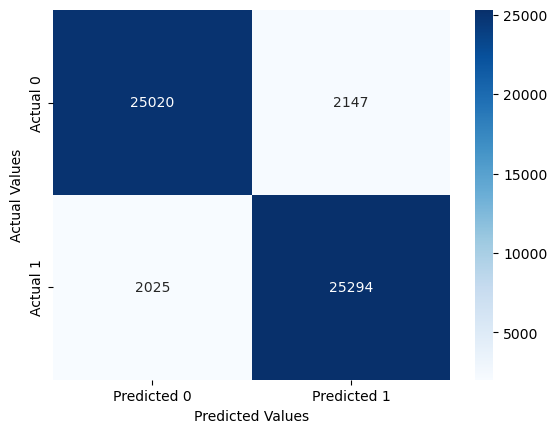

In [59]:
confusion_matrix_train(stats_model)

Classification accuracy = 92.6%


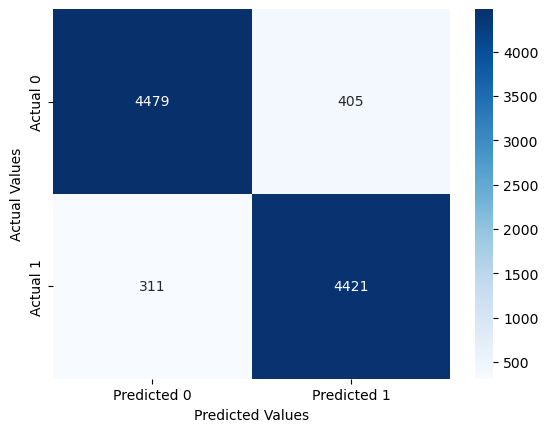

In [60]:
confusion_matrix_test(X_test_smaller, y_test, stats_model)

In [61]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          POOR_MENTHLTH   No. Observations:                54486
Model:                          Logit   Df Residuals:                    54450
Method:                           MLE   Df Model:                           35
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.6998
Time:                        19:21:37   Log-Likelihood:                -11337.
converged:                       True   LL-Null:                       -37767.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
PHYSHLTH                                  0.0550      0.002     29.860      0.000       0.051       0.059
MEDCOST                                   0.5467      0.050     10.974      0.000       0.449       0.644
ASTHMA3                                   0.1717      0.047      3.687      0.000       0.080       0.263
DECIDE                                    1.4824      0.049     30.536      0.000       1.387       1.578
DIFFALON                                  0.3242      0.057      5.703      0.000       0.213       0.436
SMOKE100                                  0.0773      0.035      2.202      0.028       0.008       0.146
CHILDREN                                  0.0272      0.017      1.572      0.116      -0.007       0.061
FVBEANS                                  -0.0048      0.001     -3.828      0.000      -0.007      -0.002
FVGREEN                                  -0.0059      0.001     -6.458      0.000      -0.008      -0.004
_DRNKWEK                               5.747e-07   7.19e-07      0.800      0.424   -8.34e-07    1.98e-06
_DRDXAR1                                 -0.0232      0.039     -0.592      0.554      -0.100       0.054
CCLGHOUS_Yes                             -5.8679      0.081    -72.036      0.000      -6.028      -5.708
GENHLTH_Fair                              0.3035      0.049      6.246      0.000       0.208       0.399
GENHLTH_Good                              0.1554      0.040      3.905      0.000       0.077       0.233
BPHIGH4_Yes                              -0.1988      0.037     -5.309      0.000      -0.272      -0.125
SEX_Female                               -0.0374      0.036     -1.041      0.298      -0.108       0.033
MARITAL_Separated                         0.4108      0.105      3.909      0.000       0.205       0.617
EDUCA_some college                       -0.0096      0.038     -0.252      0.801      -0.084       0.065
EMPLOY1_1 year out of work                0.4623      0.098      4.700      0.000       0.269       0.655
EMPLOY1_less than 1 year out of work      0.3990      0.100      3.990      0.000       0.203       0.595
INCOME2_<10,000                           0.2542      0.067      3.821      0.000       0.124       0.385
CRGVLNG1_1-6 months                       2.1575      0.056     38.687      0.000       2.048       2.267
CRGVLNG1_5+ years                         2.1935      0.044     50.192      0.000       2.108       2.279
CRGVHRS1_0-8 hours/week                   0.4564      0.042     10.795      0.000       0.374       0.539
CRGVHRS1_20-39 hours/week                 0.0009      0.069      0.013      0.990      -0.135       0.136
SCNTMNY1_Never                            0.3376      0.040      8.378      0.000       0.259       0.417
SCNTMNY1_Usually                          1.9331      0.064     30.105      0.000       1.807       2.059
SCNTMEL1_Always                           1.7114      0.062  